#    Introducción

Este análisis se basa en un conjunto de datos sobre el desempeño y la rotación de empleados en una fábrica, con 411,948 observaciones durante 18 meses. Los datos incluyen eventos como asistencia, eficacia laboral, accidentes, renuncias e incorporaciones de nuevos empleados. El objetivo es explorar cómo factores como la edad, el desempeño y el trabajo en equipo afectan la eficacia y la rotación, utilizando técnicas de análisis de datos para identificar patrones y relaciones causales.

Fuente: Kaggle


# Preguntas de Interés

1. ¿Cómo varía la eficacia  entre los distintos roles (por ejemplo, entre Laborers y Team Leaders)?
2. ¿Existen diferencias significativas en la eficacia diaria entre empleados masculinos y femeninos?
3. ¿Cómo influye la edad del empleado en su eficacia diaria?
4. ¿Se asocia un índice de salud más alto con mayores niveles de eficacia?
5. ¿La eficacia presenta patrones estacionales según el día de la semana, el día del mes o el mes del año?
6. ¿Cómo impacta la diferencia de edad entre un empleado y su supervisor en la eficacia diaria?




Importar Librerías


In [39]:
import gdown
import patoolib
import pandas as pd
from io import BytesIO
import tempfile
import os
import matplotlib.pyplot as plt 
import seaborn as sns

Descarga de la base de datos desde la URL

Con requests, se descarga el archivo .rar desde la URL

In [21]:
# URL de Google Drive
url = "https://drive.google.com/file/d/1B2F_-yLpBFiTyNzpE4M4hxDtMHUqGnPU/view?usp=drive_link"

# Extraer el ID del archivo
file_id = url.split("/d/")[1].split("/")[0]

# Descargar el archivo en memoria
output = BytesIO()
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# Guardar el archivo .rar en un archivo temporal
with tempfile.NamedTemporaryFile(delete=False, suffix=".rar") as tmp_file:
    tmp_file.write(output.getvalue())
    rar_path = tmp_file.name

# Descomprimir el archivo .rar en una carpeta temporal
extract_dir = tempfile.mkdtemp()
patoolib.extract_archive(rar_path, outdir=extract_dir)

# Cargar el archivo CSV (suponiendo que hay un solo archivo en el .rar)
csv_file = os.path.join(extract_dir, os.listdir(extract_dir)[0])

# Intentar con diferentes codificaciones
encodings = ['utf-8', 'latin-1', 'ISO-8859-1', 'Windows-1252']
df = None

for encoding in encodings:
    try:
        df = pd.read_csv(csv_file, encoding=encoding)
        print(f"Archivo cargado correctamente con codificación: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Error con la codificación: {encoding}")

if df is not None:
    # Exploración inicial
    print("Primeras filas del dataset:")
    print(df.head())

    print("\nInformación del dataset:")
    print(df.info())

    print("\nValores faltantes por columna:")
    print(df.isnull().sum())
else:
    print("No se pudo cargar el archivo con ninguna de las codificaciones probadas.")

# Limpiar archivos temporales
os.remove(rar_path)
for file in os.listdir(extract_dir):
    os.remove(os.path.join(extract_dir, file))
os.rmdir(extract_dir)

Downloading...
From: https://drive.google.com/uc?id=1B2F_-yLpBFiTyNzpE4M4hxDtMHUqGnPU
To: <_io.BytesIO object at 0x000002B1FF83BDD0>
100%|██████████| 2.95M/2.95M [00:00<00:00, 3.88MB/s]
INFO patool: Extracting C:\Users\Bautista\AppData\Local\Temp\tmp_qipg12r.rar ...
INFO patool: could not find a 'file' executable, falling back to guess mime type by file extension
INFO patool: running "C:\Program Files\WinRAR\rar.EXE" x -kb -or -- C:\Users\Bautista\AppData\Local\Temp\tmp_qipg12r.rar
INFO patool: ... C:\Users\Bautista\AppData\Local\Temp\tmp_qipg12r.rar extracted to `C:\Users\Bautista\AppData\Local\Temp\tmpmfqrv3hn'.


Error con la codificación: utf-8


C:\Users\Bautista\AppData\Local\Temp\ipykernel_11696\343322851.py:29: DtypeWarning: Columns (35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, encoding=encoding)


Archivo cargado correctamente con codificación: latin-1
Primeras filas del dataset:
     sub_ID  sub_fname sub_lname  sub_age sub_sex sub_shift sub_team  \
0  98000001    Rebecca     Bauer       40       F   Shift 1   Team 1   
1  98000001    Rebecca     Bauer       40       F   Shift 1   Team 1   
2  98000002       Joan    Winter       61       F   Shift 1   Team 2   
3  98000002       Joan    Winter       61       F   Shift 1   Team 2   
4  98000003  Elizabeth  Martinez       20       F   Shift 1   Team 3   

      sub_role                                       sub_coll_IDs  \
0  Team Leader  [98000002, 98000003, 98000004, 98000005, 98000...   
1  Team Leader  [98000002, 98000003, 98000004, 98000005, 98000...   
2  Team Leader  [98000001, 98000003, 98000004, 98000005, 98000...   
3  Team Leader  [98000001, 98000003, 98000004, 98000005, 98000...   
4  Team Leader  [98000001, 98000002, 98000004, 98000005, 98000...   

   sub_colls_same_sex_prtn  ...  event_weekday_num  event_weekday_na

Exploración inicial del Dataset

Veamos:

- Primeras Filas del Dataset
- Información General del Dataset
- Estadísticas Descriptivas

In [29]:
# Ajustar la configuración de pandas para evitar truncamiento
pd.set_option('display.max_rows', 100)  # Mostrar hasta 100 filas
pd.set_option('display.max_columns', 100)  # Mostrar hasta 100 columnas
pd.set_option('display.width', 1000)  # Ajustar el ancho de la salida

# Obtener el número de filas y columnas
filas, columnas = df.shape

# Mostrar el resultado
print(f"El dataset tiene {filas} filas y {columnas} columnas.")

# Mostrar las primeras 5 filas del dataset
print("Primeras filas del dataset:")
print(df.head())



El dataset tiene 411948 filas y 42 columnas.
Primeras filas del dataset:
     sub_ID  sub_fname sub_lname  sub_age sub_sex sub_shift sub_team     sub_role                                       sub_coll_IDs  sub_colls_same_sex_prtn  sub_health_h  sub_commitment_h  sub_perceptiveness_h  sub_dexterity_h  sub_sociality_h  sub_goodness_h  sub_strength_h  sub_openmindedness_h sub_workstyle_h      sup_ID sup_fname sup_lname  sup_age  sup_sub_age_diff sup_sex       sup_role  sup_commitment_h  sup_perceptiveness_h  sup_goodness_h event_date  event_week_in_series  event_day_in_series  event_weekday_num event_weekday_name behav_comptype_h behav_cause_h  actual_efficacy_h record_comptype record_cause  recorded_efficacy recorded_note_from_sup record_conf_matrix_h
0  98000001    Rebecca     Bauer       40       F   Shift 1   Team 1  Team Leader  [98000002, 98000003, 98000004, 98000005, 98000...                 0.714286         0.895             1.000                 0.659            0.592           

In [ ]:
# Mostrar las primeras 15 columnas
print("Primeras 10 columnas:")
df[df.columns[:15]].info(verbose=True, show_counts=True)



Primeras 10 columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411948 entries, 0 to 411947
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   sub_ID                   411948 non-null  int64  
 1   sub_fname                411948 non-null  object 
 2   sub_lname                411948 non-null  object 
 3   sub_age                  411948 non-null  int64  
 4   sub_sex                  411948 non-null  object 
 5   sub_shift                411948 non-null  object 
 6   sub_team                 411948 non-null  object 
 7   sub_role                 411948 non-null  object 
 8   sub_coll_IDs             411136 non-null  object 
 9   sub_colls_same_sex_prtn  410957 non-null  float64
 10  sub_health_h             411948 non-null  float64
 11  sub_commitment_h         411948 non-null  float64
 12  sub_perceptiveness_h     411948 non-null  float64
 13  sub_dexterity_h          411948 non-n

In [32]:
# Mostrar entre las columnas 15 y 30
print("Columnas entre 15 y 30 columnas:")
df[df.columns[15:30]].info(verbose=True, show_counts=True)

Columnas entre 15 y 30 columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411948 entries, 0 to 411947
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   sub_goodness_h        411948 non-null  float64
 1   sub_strength_h        411948 non-null  float64
 2   sub_openmindedness_h  411948 non-null  float64
 3   sub_workstyle_h       411948 non-null  object 
 4   sup_ID                411136 non-null  float64
 5   sup_fname             411136 non-null  object 
 6   sup_lname             411136 non-null  object 
 7   sup_age               411136 non-null  float64
 8   sup_sub_age_diff      411136 non-null  float64
 9   sup_sex               411136 non-null  object 
 10  sup_role              411136 non-null  object 
 11  sup_commitment_h      411136 non-null  float64
 12  sup_perceptiveness_h  411136 non-null  float64
 13  sup_goodness_h        411136 non-null  float64
 14  event_date         

In [34]:
# Mostrar entre las columnas 30 y 42
print("Columnas entre 15 y 42 columnas:")
df[df.columns[30:45]].info(verbose=True, show_counts=True)

Columnas entre 15 y 42 columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411948 entries, 0 to 411947
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   event_week_in_series    411948 non-null  int64  
 1   event_day_in_series     411948 non-null  int64  
 2   event_weekday_num       411948 non-null  int64  
 3   event_weekday_name      411948 non-null  object 
 4   behav_comptype_h        411846 non-null  object 
 5   behav_cause_h           77 non-null      object 
 6   actual_efficacy_h       191657 non-null  float64
 7   record_comptype         408010 non-null  object 
 8   record_cause            102 non-null     object 
 9   recorded_efficacy       191272 non-null  float64
 10  recorded_note_from_sup  18589 non-null   object 
 11  record_conf_matrix_h    21715 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 37.7+ MB


Interpretación de las columnas:


- behav_cause_h, record_cause, recorded_note_from_sup, y record_conf_matrix_h poseen muchos valores faltantes (99,9%), por lo que no se utilizarán para un analisis univariado, se decide no eliminar ya que pueden contener información puntual relevante
- behav_comptype_h  y record_comptype poseen muy pocos faltantes, por lo que se puede optar por eliminar esos valores faltantes, replazar con la moda, o utilizar otros métodos más avanzados si se considera necesario
- actual_efficacy_h y recorded_efficacy poseen un 50% de valores faltantes, por lo que la desición va a depender de un mayor analisis

In [35]:
# Obtener estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
             sub_ID        sub_age  sub_colls_same_sex_prtn   sub_health_h  sub_commitment_h  sub_perceptiveness_h  sub_dexterity_h  sub_sociality_h  sub_goodness_h  sub_strength_h  sub_openmindedness_h        sup_ID        sup_age  sup_sub_age_diff  sup_commitment_h  sup_perceptiveness_h  sup_goodness_h  event_week_in_series  event_day_in_series  event_weekday_num  actual_efficacy_h  recorded_efficacy
count  4.119480e+05  411948.000000            410957.000000  411948.000000     411948.000000         411948.000000    411948.000000    411948.000000   411948.000000   411948.000000         411948.000000  4.111360e+05  411136.000000     411136.000000     411136.000000         411136.000000   411136.000000         411948.000000        411948.000000      411948.000000      191657.000000      191272.000000
mean   9.800036e+07      41.395637                 0.502392       0.747096          0.751878              0.742695         0.741493         0.738500        0.73

#   Análisis Exploratorio de Datos (EDA)

#   Análisis Univariado

- Sub_age
- Sub_health
- actual_efficacy



In [36]:
# Estadísticas descriptivas de las variables numéricas
print("Estadísticas descriptivas de las variables numéricas:")
print(df[['sub_age', 'sub_health_h', 'actual_efficacy_h']].describe())

Estadísticas descriptivas de las variables numéricas:
             sub_age   sub_health_h  actual_efficacy_h
count  411948.000000  411948.000000      191657.000000
mean       41.395637       0.747096           0.669063
std        13.735554       0.154026           0.396246
min        18.000000       0.153000           0.000000
25%        29.000000       0.655000           0.410000
50%        41.000000       0.765000           0.615000
75%        53.000000       0.859000           0.874000
max        65.000000       1.000000           3.763000


- Dentro del rango de edad, esta todo correcto dado el rango min y max, con una media de 41 años

- El índice de salud está centrado alrededor de 0.747, con una dispersión baja, existen sujetos con salud "perfecta"
- Hay valores faltantes, y parece que hay valores atípicos en el extremo superior, qeu difieren de la media

Visualización de las distribuciones

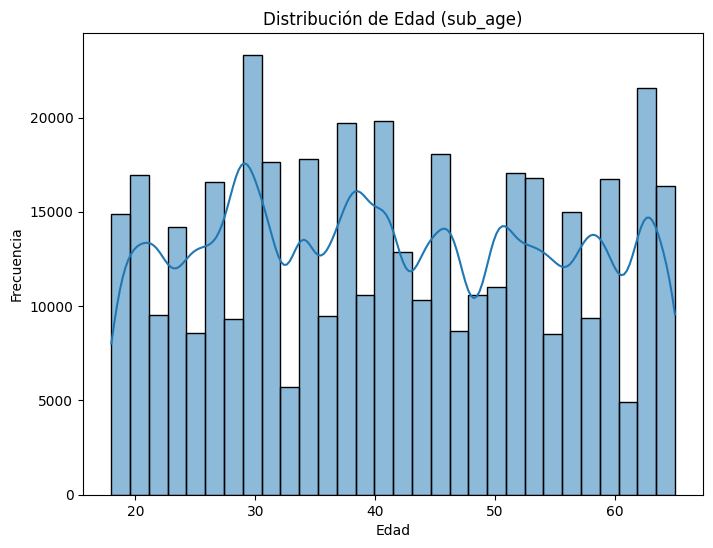

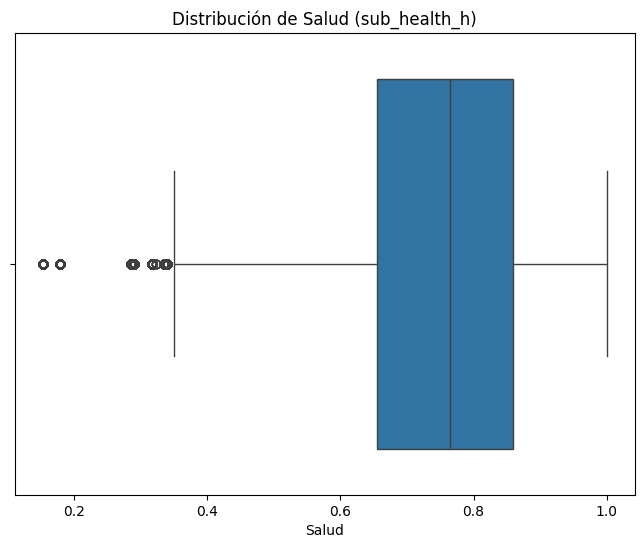

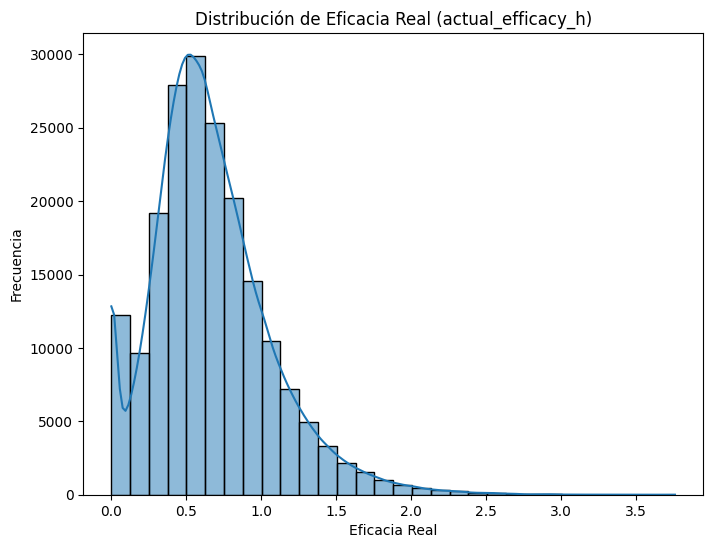

In [40]:
# Histograma para sub_age
plt.figure(figsize=(8, 6))
sns.histplot(df['sub_age'], kde=True, bins=30)
plt.title('Distribución de Edad (sub_age)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para sub_health_h
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sub_health_h'])
plt.title('Distribución de Salud (sub_health_h)')
plt.xlabel('Salud')
plt.show()

# Histograma para actual_efficacy_h
plt.figure(figsize=(8, 6))
sns.histplot(df['actual_efficacy_h'].dropna(), kde=True, bins=30)
plt.title('Distribución de Eficacia Real (actual_efficacy_h)')
plt.xlabel('Eficacia Real')
plt.ylabel('Frecuencia')
plt.show()

Interpretación

- Sub_age = Las barras del histograma son relativamente uniformes, Esto sugiere que no hay una edad predominante en la población. Las edades están distribuidas de manera equitativa entre 18 y 65 años. No hay un grupo de edad que domine significativamente
- Sub_Health = Hay outliers por debajo, podrían ser casos especiales que merecen una investigación más profunda (por ejemplo, sujetos con problemas de salud específicos), pero en general, la mayoría de los sujetos tienen un índice de salud relativamente alto.
- Efficacy = Está sesgada a la izquierda, con pocos sujetos de eficacia muy alta, la eficacia no está distribuida de manera uniforme Podría ser el caso de que existan factores que influyan en la eficacia de los sujetos (por ejemplo, experiencia, habilidades, etc.)

#   Análisis Univariado

- Sub_sex
- Sub_role

Frecuencias de sub_sex:
sub_sex
F    215556
M    196392
Name: count, dtype: int64


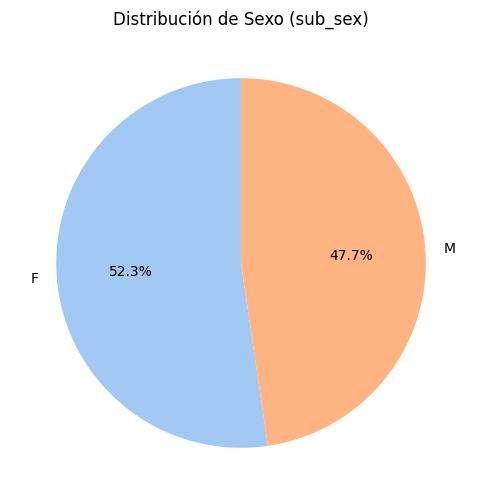

Frecuencias de sub_role:
sub_role
Laborer                389184
Team Leader             19469
Shift Manager            2483
Production Director       812
Name: count, dtype: int64


C:\Users\Bautista\AppData\Local\Temp\ipykernel_11696\1429922696.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencias_role.values, y=frecuencias_role.index, palette='pastel')


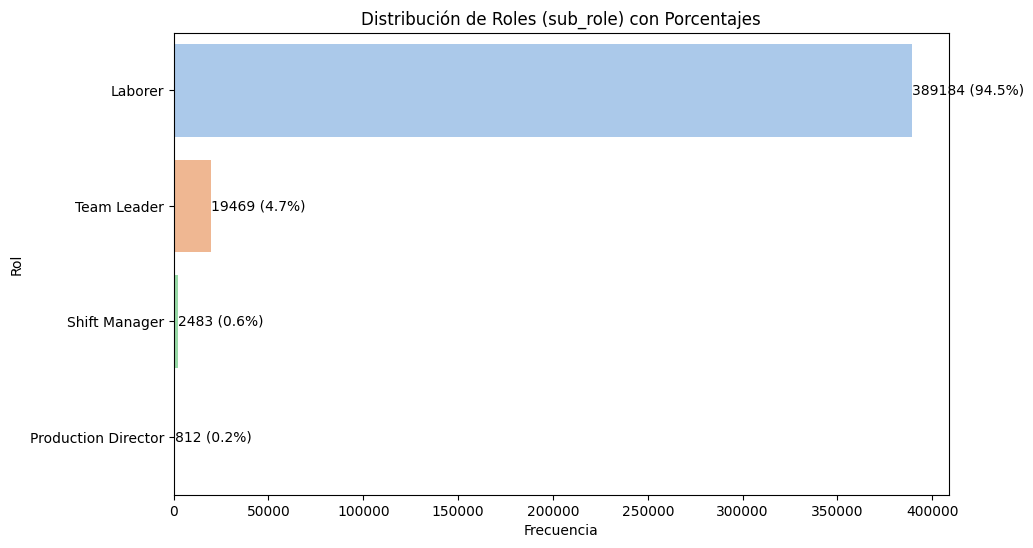

In [52]:
# Frecuencias de sub_sex
print("Frecuencias de sub_sex:")
print(df['sub_sex'].value_counts())

# Gráfico de torta para sub_sex
frecuencias_sex = df['sub_sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(frecuencias_sex, labels=frecuencias_sex.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de Sexo (sub_sex)')
plt.show()


# Frecuencias de sub_role
print("Frecuencias de sub_role:")
print(df['sub_role'].value_counts())

# Calcular frecuencias y porcentajes
frecuencias_role = df['sub_role'].value_counts()
porcentajes_role = (frecuencias_role / frecuencias_role.sum()) * 100  # Porcentajes

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=frecuencias_role.values, y=frecuencias_role.index, palette='pastel')

# Agregar etiquetas con los porcentajes
for i, (valor, porcentaje) in enumerate(zip(frecuencias_role.values, porcentajes_role.values)):
    ax.text(valor, i, f'{valor} ({porcentaje:.1f}%)', va='center', fontsize=10)

# Añadir título y etiquetas
plt.title('Distribución de Roles (sub_role) con Porcentajes')
plt.xlabel('Frecuencia')
plt.ylabel('Rol')
plt.show()

Interpretación

- En cuanto al género, al aproximarse tanto al 50% un analisis bivariado podrá dar más detalles al respecto,por ejemplo, con sub_role, pero habría que ver como por qué es string, por lo que se podría crear nueva columna con valores binarios..., para ver
- Laborer representa casi el 95% de los empleados se podría analizar cual es su relación con su eficiencia, y su edad

#   Analisis bivariado

Una matriz de correlación, no va a ser posible dado que la mayoría son variables cualitativas, habría que investigar otro tipo de analisis descriptivo

- Género vs. Eficacia 

- Rol vs. Eficacia

- Género vs. Rol

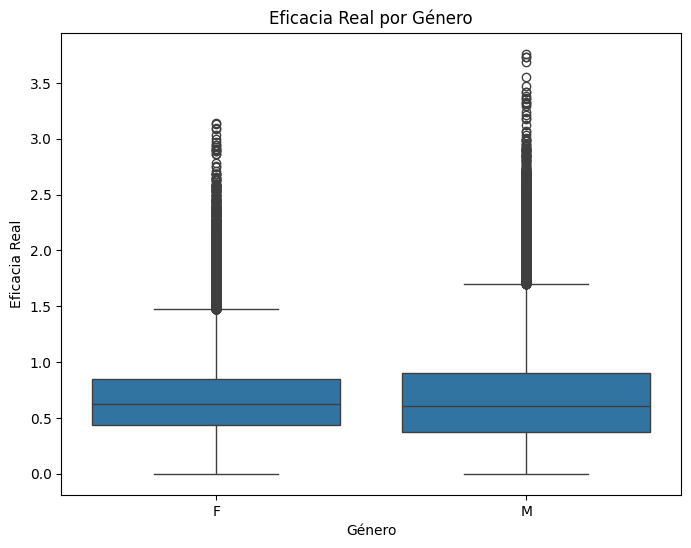

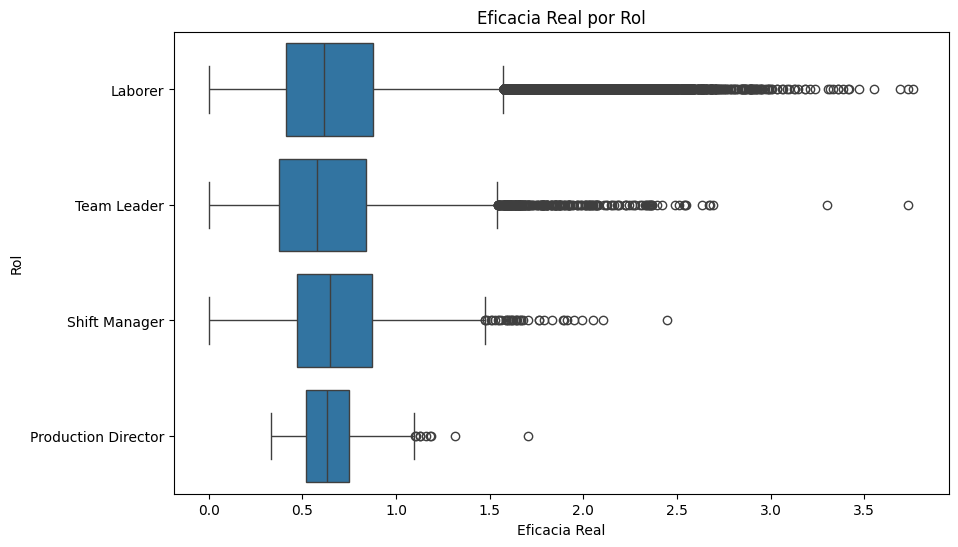

<Figure size 1000x600 with 0 Axes>

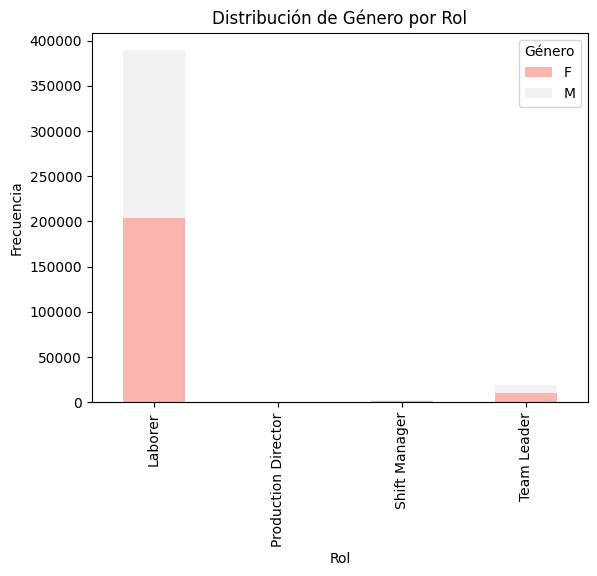

In [57]:
# Boxplot de eficacia por género
plt.figure(figsize=(8, 6))
sns.boxplot(x='sub_sex', y='actual_efficacy_h', data=df)
plt.title('Eficacia Real por Género')
plt.xlabel('Género')
plt.ylabel('Eficacia Real')
plt.show()

# Boxplot de eficacia por rol
plt.figure(figsize=(10, 6))
sns.boxplot(x='actual_efficacy_h', y='sub_role', data=df, order=df['sub_role'].value_counts().index)
plt.title('Eficacia Real por Rol')
plt.xlabel('Eficacia Real')
plt.ylabel('Rol')
plt.show()

# Gráfico de barras apiladas para género por rol
plt.figure(figsize=(10, 6))
df.groupby(['sub_role', 'sub_sex']).size().unstack().plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Distribución de Género por Rol')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.legend(title='Género')
plt.show()

Interpretación


- Boxplot de eficacia por género
Se observa que tanto para hombres como mujeres, la distribución de la eficacia es bastante similar, Hay una gran cantidad de valores atípicos (puntos fuera del rango del bigote), lo que sugiere que existen casos donde la eficacia es mucho mayor que la media. No se aprecia una diferencia significativa en la distribución de la eficacia entre hombres y mujeres.

- Boxplot de eficacia por rol
Se observa que los valores de eficacia varían significativamente entre roles pero con una media muy similar entre los mismos, aunque se puede destacar que la media del rol de "Shift manager" es un tanto superior al resto de roles, sin considerar aquellos valores atipicos.Los  "Laborer" y "Team Leader" tienen una mayor dispersión en la eficacia, con muchos valores atípicos en la parte superior.En general, se observa que hay muchas observaciones con eficacia anormalmente alta, lo que podría indicar problemas en la calidad de los datos o la forma en que se mide la eficacia.

- Distribución de Género por Rol
No se logra detectar una variación muy grande entre los roles según genero, ni para el rol de Laborer ni en los altos mandos, lo que sugiere una distribución con mayor equidad entre los diferentes roles

 Edad vs eficacia


 (Se utiliza la mediana, por la cantidad de valores atipicos presentados, no se considera eliminar o utilizar alguna otra medida por que se consideró más practico y una opción más robusta utilizar la mediana)

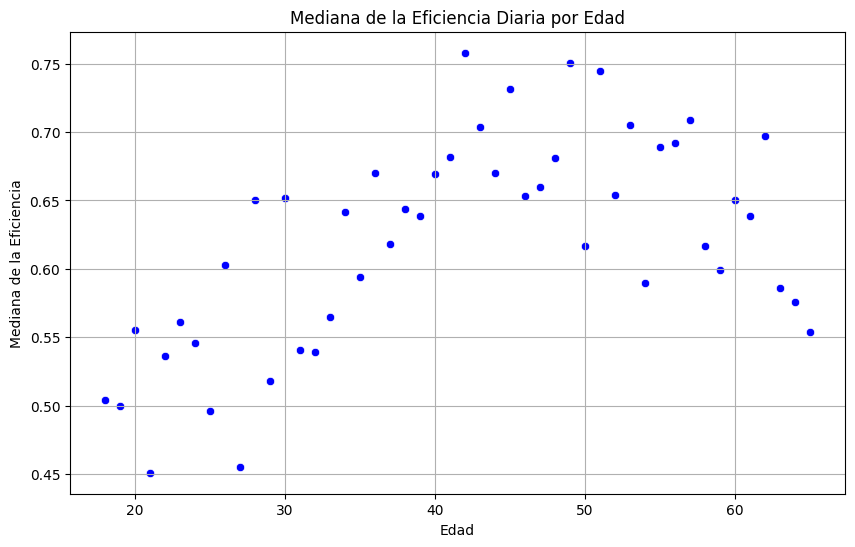

In [66]:
# Calculamos la mediana de la eficiencia por edad
mediana_eficacia_por_edad = df.groupby('sub_age')['actual_efficacy_h'].median().reset_index()

# Graficamos los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mediana_eficacia_por_edad, x='sub_age', y='actual_efficacy_h', marker='o', color='blue')
plt.title('Mediana de la Eficiencia Diaria por Edad')
plt.xlabel('Edad')
plt.ylabel('Mediana de la Eficiencia')
plt.grid(True)
plt.show()



La edad influye de tal forma que los más jovenes en la empresa tienen el puntaje de eficiencia menor, que mientras pasan los años crece paulatinamente hasta un pico entre los 45 - 50 años, luego decae hasta los 64 pero no decae tanto la eficiencia como el caso de los más jóvenes

Salud vs Eficacia

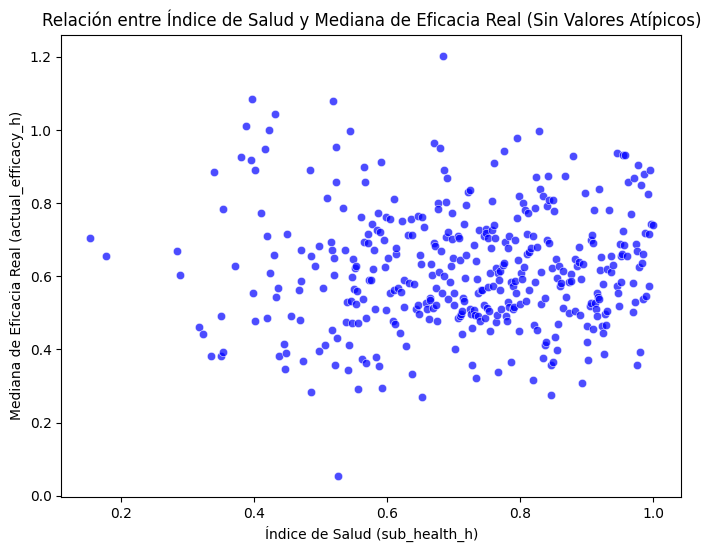

Correlación entre Índice de Salud y Mediana de Eficacia Real: 0.02


In [75]:
# Calcular los percentiles 1% y 99% de actual_efficacy_h
limite_inferior = df['actual_efficacy_h'].quantile(0.01)
limite_superior = df['actual_efficacy_h'].quantile(0.99)

# Filtrar los datos para eliminar valores atípicos
df_filtrado = df[(df['actual_efficacy_h'] >= limite_inferior) & (df['actual_efficacy_h'] <= limite_superior)]

# Calcular la mediana de la eficacia por índice de salud en los datos filtrados
mediana_eficacia_por_salud = df_filtrado.groupby('sub_health_h')['actual_efficacy_h'].median().reset_index()

# Gráfico de dispersión entre sub_health_h y la mediana de actual_efficacy_h
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sub_health_h', y='actual_efficacy_h', data=mediana_eficacia_por_salud, alpha=0.7, color='blue')
plt.title('Relación entre Índice de Salud y Mediana de Eficacia Real (Sin Valores Atípicos)')
plt.xlabel('Índice de Salud (sub_health_h)')
plt.ylabel('Mediana de Eficacia Real (actual_efficacy_h)')
plt.show()

# Calcular la correlación entre sub_health_h y la mediana de actual_efficacy_h
correlacion = mediana_eficacia_por_salud['sub_health_h'].corr(mediana_eficacia_por_salud['actual_efficacy_h'])
print(f"Correlación entre Índice de Salud y Mediana de Eficacia Real: {correlacion:.2f}")

Interpretación
No existe relación entre la eficiencia y la salud del empleado, en este caso se filtró valores atipicos fuera del 1% y el 99% pero el gráfico no cambió. Se concluye que no hay relación entre el índice de salud y la eficiencia

Eficiencia y las fechas de trabajo

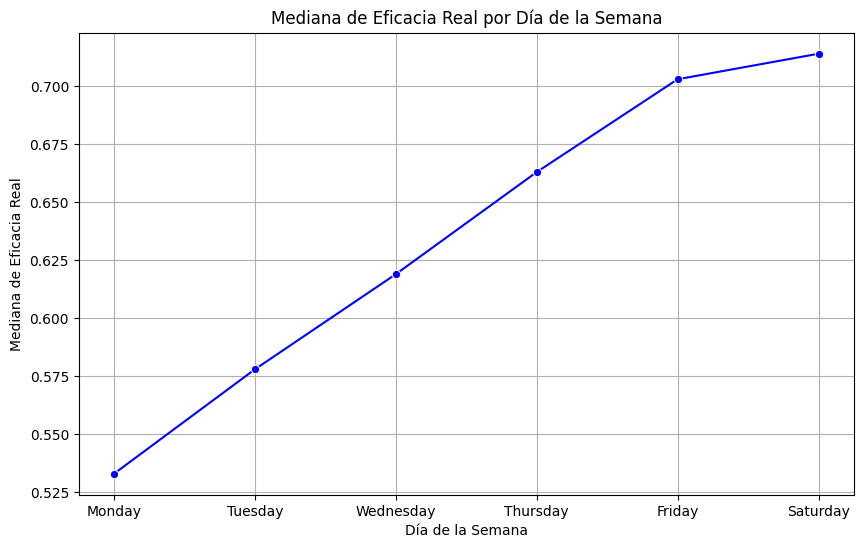

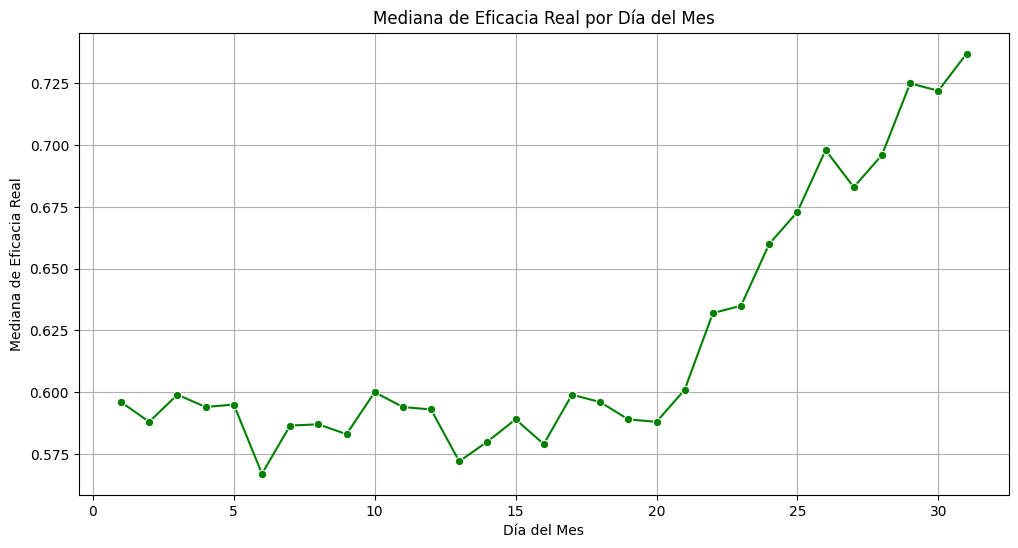

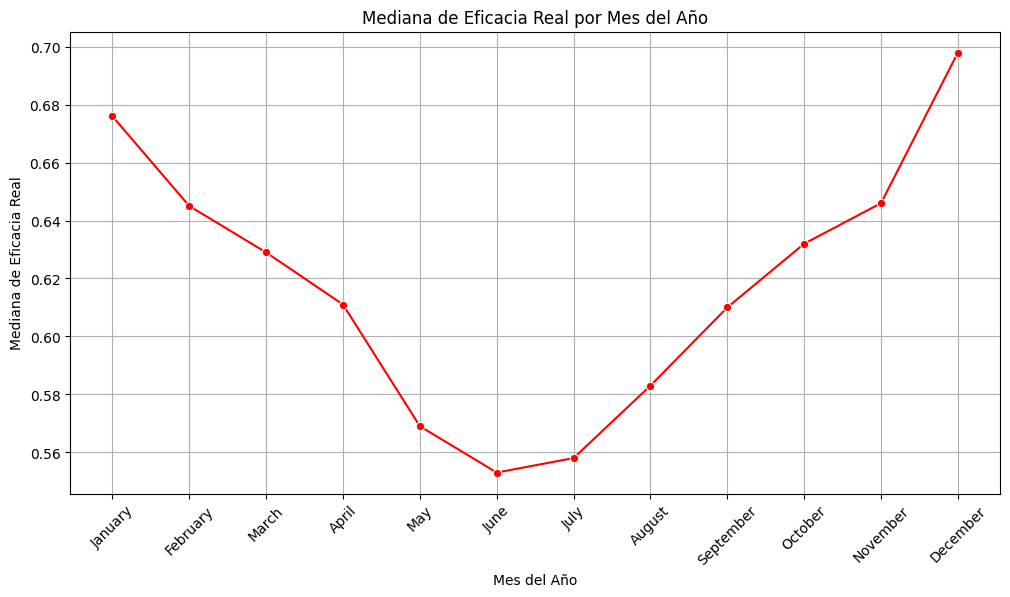

In [78]:
# Eficacia promedio por día de la semana
eficacia_por_dia_semana = df.groupby('day_of_week')['actual_efficacy_h'].median().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Gráfico de eficacia por día de la semana
plt.figure(figsize=(10, 6))
sns.lineplot(x=eficacia_por_dia_semana.index, y=eficacia_por_dia_semana.values, marker='o', color='blue')
plt.title('Mediana de Eficacia Real por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Mediana de Eficacia Real')
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
plt.show()

# Eficacia promedio por día del mes
eficacia_por_dia_mes = df.groupby('day_of_month')['actual_efficacy_h'].median()

# Gráfico de eficacia por día del mes
plt.figure(figsize=(12, 6))
sns.lineplot(x=eficacia_por_dia_mes.index, y=eficacia_por_dia_mes.values, marker='o', color='green')
plt.title('Mediana de Eficacia Real por Día del Mes')
plt.xlabel('Día del Mes')
plt.ylabel('Mediana de Eficacia Real')
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
plt.show()

# Eficacia promedio por mes del año
eficacia_por_mes = df.groupby('month')['actual_efficacy_h'].median().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Gráfico de eficacia por mes del año
plt.figure(figsize=(12, 6))
sns.lineplot(x=eficacia_por_mes.index, y=eficacia_por_mes.values, marker='o', color='red')
plt.title('Mediana de Eficacia Real por Mes del Año')
plt.xlabel('Mes del Año')
plt.ylabel('Mediana de Eficacia Real')
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.show()

Interpretación

- Analizar por qué la eficiencia crece paulatinamente a lo largo de la semana, ¿mayor motivación? ¿Mayor demanda laboral?
- La eficiencia por día del mes lo mismo, las demandas al final del mes pueden crecer, mayor profundidad en el rubro de la empresa puede dar más respuestas
- A lo largo del año, puede variar por vacaciones de la empresa, y los picos en los extremos de mayor eficiencia


De vuelta se consideró la mediana al ser más robusta frente a valores atípicos